In [3]:
# if jupyterlab:
%matplotlib widget
# if jupyter notebook:
# %matplotlib notebook

import torch
import numpy as np 
import matplotlib.pyplot as plt
from recoMRD_B1TFL import recoMRD_B1TFL

torch.set_printoptions(linewidth=380)

def plot3D(img:np.ndarray, cmap='turbo', clim=None, pos = None):
    img = img.squeeze()
    if pos is None:
        pos = [x//2 for x in img.shape[0:3]]
        
    plt.figure()
    plt.subplot(131)
    plt.imshow(img[:,:,pos[2]], cmap=cmap, origin='lower',clim=clim)
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(img[:,pos[1],:], cmap=cmap, origin='lower',clim=clim)
    plt.axis('off')
    plt.subplot(133)
    plt.imshow(img[pos[0],:,:], cmap=cmap, origin='lower',clim=clim)
    plt.axis('off')
    plt.colorbar()
    plt.tight_layout() 


def plot_mosaic(img:np.ndarray, cmap='turbo', clim=None, grid_shape=None, title=None, transpose=False):
    from skimage.util import montage
    img = np.squeeze(img) 
    if img.ndim > 3:
        print(f'Error! plot_mosaic expects 3D data but it is {img.ndim}D')
        return
    img = np.moveaxis(img,-1,0)
    img = montage(img, fill=0, grid_shape=grid_shape)
    if transpose:
        img = img.T
    
    plt.figure()
    plt.imshow(img, cmap=cmap, interpolation='nearest', clim=clim)
    plt.axis('off')
    if title is not None:
        plt.title(title)
    plt.colorbar()
    plt.tight_layout() 

# filename = './../example_data/meas_MID00169_FID22881_db_TFLb1_oneInv.mrd'
filename = './../example_data/tflb1/meas_MID00353_FID62969_db_TFLb1_ICE_64Slc.mrd'
mrd = recoMRD_B1TFL(filename, device='cuda')


Number of reference scans: 576
Number of image     scans: 27030
k-space size in protocol: 128 x 64 x 64
image   size in protocol: 64 x 64 x 64
k-space encoding size (64 x 64) differs from max encoding step (63 x 64)
This can be due to parallel imaging, partial Fourier, etc.
Acceleration factor: 2 x 2
Reference scan type: separate
Existing scans: acs, noise, image_scan.
Fully sampled array size=[32, 128, 64, 64, 1, 1, 34, 1, 1, 1, 1]


Filling acs       , size=[32, 128, 24, 24, 1, 1, 1, 1, 1, 1, 1]: 100%|██████████| 576/576 [00:00<00:00, 18667.57it/s]
Filling noise     , size=[32, 128, 1, 1, 1, 1, 1, 1, 1, 1, 1]: 100%|██████████| 16/16 [00:00<00:00, 23229.10it/s]


Hint! Asymmetric echo. RO zero pad index = 32


Filling image_scan, size=[32, 96, 32, 32, 1, 1, 34, 1, 1, 1, 1]: 100%|██████████| 27030/27030 [00:02<00:00, 11522.46it/s]


Operating Mode: 11011
Absolute Mode : 4
Relative Mode : 4
Num. Tx (Abs, Rel) : 16, 16
Pulse Duration(sec.) and Integral(volt*sec.): 0.005, 0.09485

Sequence TxScaleFactor = tensor([ 0.2500+0.0000j,  0.1231+0.2176j,  0.1768+0.1768j, -0.0668+0.2409j,  0.0000+0.2500j, -0.2176+0.1231j, -0.1768+0.1768j, -0.2409-0.0668j, -0.2500+0.0000j, -0.1231-0.2176j, -0.1768-0.1768j,  0.0668-0.2409j,  0.0000-0.2500j,  0.2176-0.1231j,  0.1768-0.1768j,  0.2409+0.0668j])
Removing oversampling...
Done!
POCS reconstruction along dim = 1 started...


Fourier transform: 100%|██████████| 32/32 [00:00<00:00, 248.15it/s]


Done!
Removing oversampling...
Done!
Computing coil sensitivity...
Calibration region 32x24x24
Done.
Done!
Combining coils... 


Fourier transform: 100%|██████████| 32/32 [00:02<00:00, 12.71it/s]


GPU reconstruction
Size: 8912896 Samples: 2228223 Acc: 4.00
Inverse scaling of the data: 0.000001
l2 regularization: 0.000100
Regularization terms: 1, Supporting variables: 0
conjugate gradients
lsqr: add GPU wrapper
	 cg:  30
Total Time: 12.342292
Done!


torch.Size([1, 64, 64, 64, 1, 1, 1, 1, 1, 1, 1])
torch.Size([1, 64, 64, 64, 1, 1, 16, 1, 1, 1, 1])


/kyb/agks/aaghaeifar/.local/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:477: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


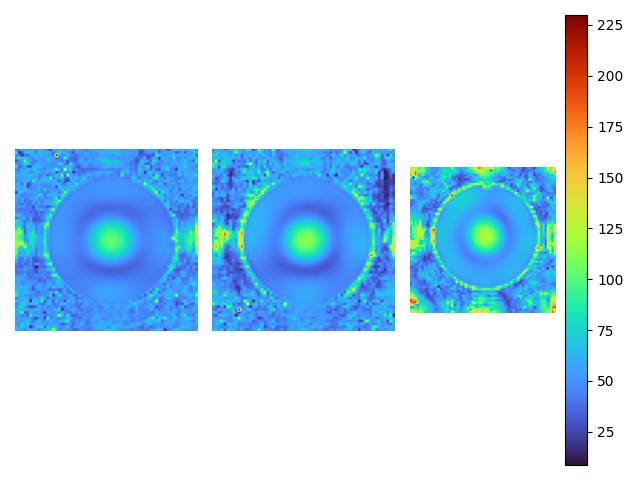

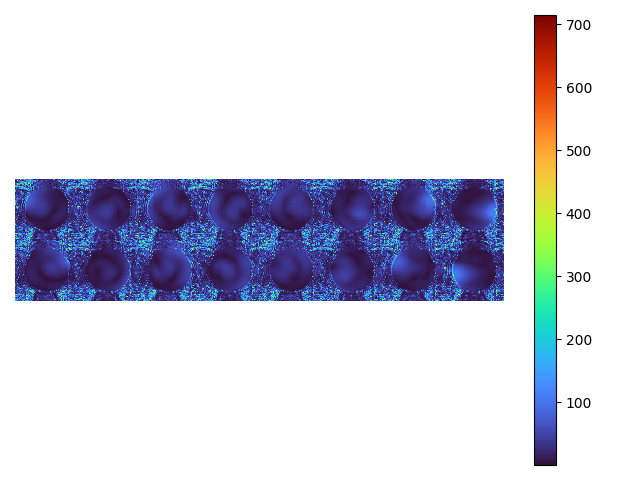

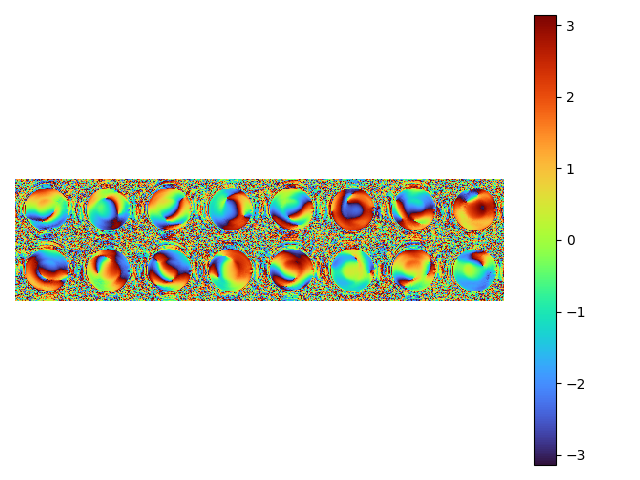

In [9]:
print(mrd.img_cp.shape)
print(mrd.img_fa.shape)
plot3D(mrd.img_cp.abs())

fa_map = mrd.img_fa.index_select(mrd.dim_info['pe2']['ind'], torch.Tensor([32]).int())
plot_mosaic(fa_map.abs().numpy(), grid_shape=(2, 8))
plot_mosaic(fa_map.angle().numpy(), grid_shape=(2, 8))
mrd.make_nifti(mrd.img_fa.angle(), '../example_data/tflb1/phase.nii')